**Author:Sejal Tawade**


 **The Sparks Foundation - Data Science and Business Analytics**

 **Task 2-Prediction Using Unsupervised ML**

Predicting the optimum number of clusters and representing it visually

**Importing required Libraries and Datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

**Reading and Loading the Iris Datasets**

In [ ]:
iris=datasets.load_iris()
i_data=pd.DataFrame(iris.data,columns=iris.feature_names)
print(i_data.shape)
i_data.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now in this case i have decided to use K-Means Clustering Procedure to predict optimum number of clusters.But first let's visualize the data so that an approximate number of classifications can be assumed.

**Predicting the optimum Number of Clusters by k-means Classification**

In [ ]:
from sklearn.cluster import KMeans
x=i_data.iloc[:,[0,1,2,3]].values
kmeans=KMeans(n_clusters=9)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_means=KMeans(n_clusters=9)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

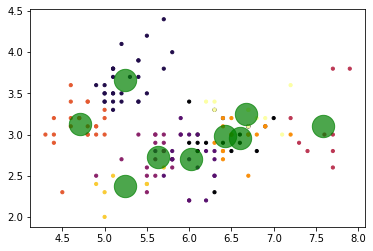

In [ ]:
y_means=kmeans.predict(x)

#plotting the Dataset for better observation

plt.scatter(x[:,0],x[:,1],c=y_means,s=10,cmap='inferno')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='green',s=500,alpha=0.7);

Quite clearly and safely we can expect that optimum number of clusters should be 2 or 3.Now with the help of Elbow Method we can confirm suitable number here.

**Predicting optimum number of clusters using elbow method**

In [ ]:
kmeans.inertia_

28.592141053391057

In [ ]:
see_=[]  #within-cluster sums of squared Error
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k).fit(x)
  see_.append([k,Kmeans.inertia_])

**Plotting the results of this method to observe the "elbow(s)" in a line graph**

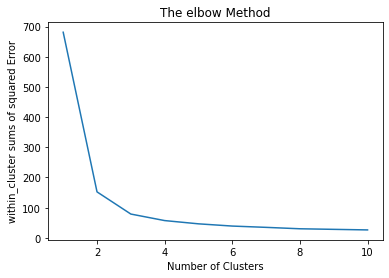

In [ ]:
plt.plot(pd.DataFrame(see_)[0],pd.DataFrame(see_)[1]);
plt.title('The elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('within_cluster sums of squared Error')
plt.show()

In [ ]:
#Predicting the Optimum Number of Clusters using Silhouette Analysis
from sklearn.metrics import silhouette_score

In [ ]:
see_ = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(x)
    see_.append([k, silhouette_score(x, kmeans.labels_)])

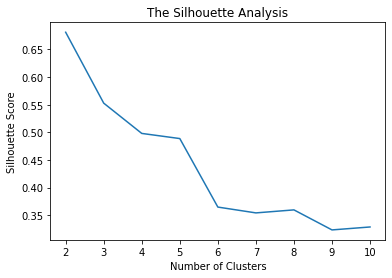

In [ ]:
#Plotting the Results of this Analysis Procedure for Better Understanding
plt.plot(pd.DataFrame(see_)[0], pd.DataFrame(see_)[1]);
plt.title('The Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score') 
plt.show()

**concluding from both the above analysis, I have decided to choose optimum number of clusters as 3**

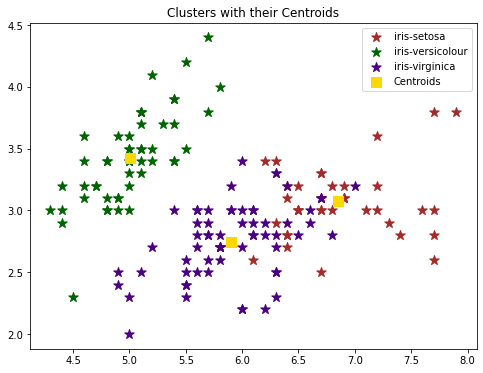

In [ ]:
#Applying K_Means Classifier to the IRIS Dataset



kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


#Representing the Clusters for Visualisation
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, marker='*', c = 'brown', label = 'iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, marker='*', c = 'darkgreen', label = 'iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, marker='*', c = 'indigo', label = 'iris-virginica')

#Plotting the Respective Centroids of the Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, marker=',', c='gold', label = 'Centroids')

plt.legend()
plt.title('Clusters with their Centroids');

**Above Scatter Plot is the visual Representation for the given Iris Dataset where we can observe that the optimum Number of clusters is 3 for this Data**